## Target Guided Ordinal Encoding 
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np

In [147]:
# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [148]:
# calculate the mean price for each city
mean_price = df.groupby(by='city')['price'].mean().to_dict() # to convert to dictionary
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [149]:
# replace each city with its mean price

df['city_encoded'] = df['city'].map(mean_price) # this map is like append one by one as mapping

In [150]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


# trying by my self...

In [151]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## checking for outliers

<Axes: >

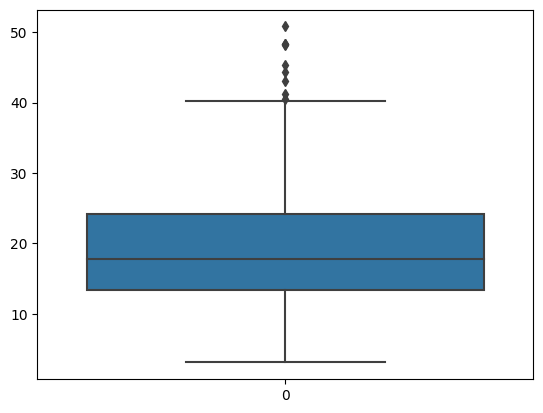

In [152]:
sns.boxplot(df['total_bill'])

## Removing outliers

In [153]:
np.percentile(df['total_bill'],q = 0.5)

6.0725

In [154]:
# calculate 5 number summary
minimum , Q1,Q2,Q3,maximum = np.quantile(a=df['total_bill'],q=[.0,.25,.5,.75,1])
minimum , Q1,Q2,Q3,maximum 

(3.07, 13.3475, 17.795, 24.127499999999998, 50.81)

In [155]:
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
higher_fence = Q3+1.5*IQR
lower_fence,higher_fence

(-2.8224999999999945, 40.29749999999999)

In [156]:
outliers = []
for i in df['total_bill']:
    if i>=lower_fence and i<=higher_fence:
        pass
    else:
        outliers.append(i)
min(outliers)

40.55

In [157]:
df_Outliers = df[(df['total_bill']) > min(outliers)].index
df_Outliers

Int64Index([59, 102, 142, 156, 170, 182, 197, 212], dtype='int64')

In [158]:
df.drop(df_Outliers,inplace=True)

In [159]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

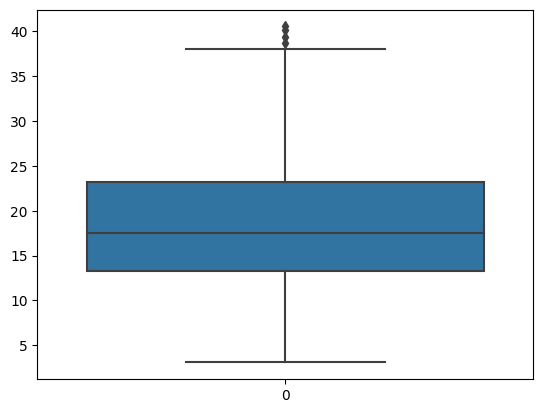

In [160]:
sns.boxplot(df['total_bill']) # now my data is fine

### by making my target variable total_bill lets encode sex , day and time

In [161]:
# sex feature
sex_mean = df.groupby(by='sex')['total_bill'].mean().to_dict()
day_mean = df.groupby(by='day')['total_bill'].mean().to_dict()
day_mean
time_mean = df.groupby(by='time')['total_bill'].mean().to_dict()
time_mean

{'Lunch': 16.41166666666667, 'Dinner': 19.85335294117647}

In [163]:
df['sex_encoded'] = df['sex'].map(sex_mean)
df['day_encoded'] = df['day'].map(day_mean)
df['time_encoded'] = df['time'].map(time_mean)
df

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,day_encoded,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,17.453412,20.724865,19.853353
1,10.34,1.66,Male,No,Sun,Dinner,3,19.700000,20.724865,19.853353
2,21.01,3.50,Male,No,Sun,Dinner,3,19.700000,20.724865,19.853353
3,23.68,3.31,Male,No,Sun,Dinner,2,19.700000,20.724865,19.853353
4,24.59,3.61,Female,No,Sun,Dinner,4,17.453412,20.724865,19.853353
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19.700000,19.116747,19.853353
240,27.18,2.00,Female,Yes,Sat,Dinner,2,17.453412,19.116747,19.853353
241,22.67,2.00,Male,Yes,Sat,Dinner,2,19.700000,19.116747,19.853353
242,17.82,1.75,Male,No,Sat,Dinner,2,19.700000,19.116747,19.853353
